# Data User Modeling Dataset Clustering

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name='Training_Data')
df = df.loc[:, ['STG', 'SCG', 'STR', 'LPR', 'PEG']]
df.describe()

,STG,SCG,STR,LPR,PEG
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.354020,0.356826,0.458794,0.432415,0.457495
std,0.211546,0.215064,0.245929,0.256962,0.266131
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.200000,0.200000,0.270000,0.250000,0.250000
50%,0.302500,0.300000,0.445000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [3]:
X = df.values

Here we are going to demostrate data with plot based on two feature.

Text(0, 0.5, 'SCG')

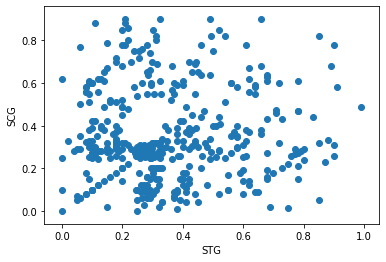

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('STG')
ax.set_ylabel('SCG')

We use `davies_bouldin_score` as a clustering metric. The lower value of this metric indicates better clustering.

## KMeans

In [5]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=2)
cls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, cls.labels_)

1.8433248989962963

## DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

cls = DBSCAN(eps=0.225)
cls.fit(X)

DBSCAN(algorithm='auto', eps=0.225, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [8]:
cls.labels_

array([-1, -1,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,
       -1,  4,  1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  2,  2,  2,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  2, -1, -1,  1, -1,  0, -1,  1,  4,
        0, -1, -1,  4, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  2, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  2,
        0, -1,  0,  0,  2,  0, -1,  1,  0, -1, -1, -1, -1,  0,  0, -1, -1,
        0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0, -1, -1

In [9]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, cls.labels_)

2.7371795344041185

## AffinityPropagation

In [10]:
from sklearn.cluster import AffinityPropagation

cls = AffinityPropagation(damping=0.7)
cls.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.7, max_iter=200, preference=None, verbose=False)

In [11]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, cls.labels_)

1.2917297154923635

## AgglomerativeClustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(n_clusters=2, linkage='average')
cls.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)

In [13]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, cls.labels_)

0.8843574515883049

## PCA

Here we are going to use Principal Component Analysis to reduce the dimensions of the problem and visualize it.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = sc.fit_transform(X_std)

Text(0, 0.5, 'PC 2')

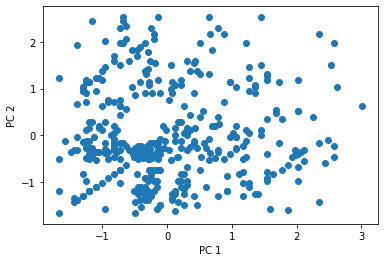

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

Based on the above diagram, we can have insight into the number of clusters, etc. One suggestion is to use the DBSCAN algorithm and try to cluster the near points as one cluster and other as outliners.

In [16]:
from sklearn.cluster import DBSCAN

cls = DBSCAN(eps=1.3)
cls.fit(X_pca)

DBSCAN(algorithm='auto', eps=1.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [17]:
cls.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0, -1,  0

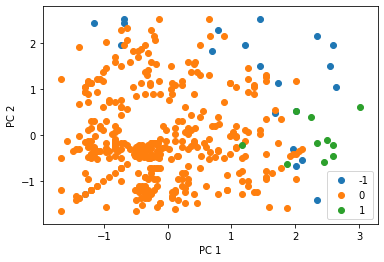

In [18]:
fig, ax = plt.subplots()

for cl in np.unique(cls.labels_):
    ax.scatter(X_pca[cls.labels_ == cl, 0], X_pca[cls.labels_ == cl, 1], label=cl)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()

In [19]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X_pca, cls.labels_)

1.7605464596837443